In [34]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

##### Loading Data

In [35]:
def load_pkl_file(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

In [36]:
def display_image(image_array, label):
    plt.imshow(image_array)
    plt.title(f'Label: {label}')
    plt.show()

In [37]:
file_path = 'mnist.pkl'
mnist_data = load_pkl_file(file_path)

In [38]:
print(type(mnist_data))

<class 'tuple'>


Training Image Label: 5


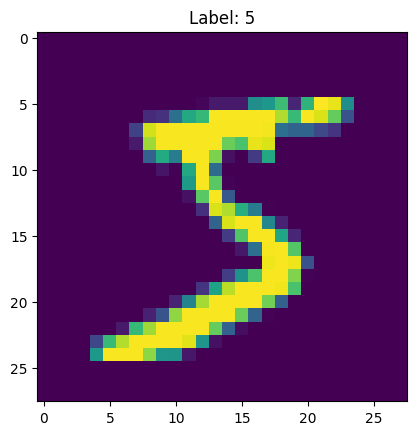

Test Image Label: 7


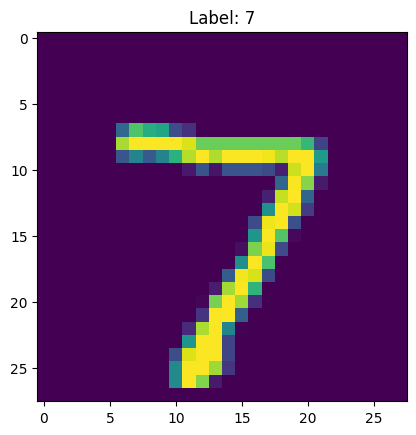

In [39]:
if isinstance(mnist_data, tuple) and len(mnist_data) == 2:
    (train_images, train_labels), (test_images, test_labels) = mnist_data
    
    # Display the first training image and its label
    if len(train_images) > 0:
        first_train_image = train_images[0]
        first_train_label = train_labels[0]
        print(f'Training Image Label: {first_train_label}')
        display_image(first_train_image, first_train_label)

    # Display the first test image and its label
    if len(test_images) > 0:
        first_test_image = test_images[0]
        first_test_label = test_labels[0]
        print(f'Test Image Label: {first_test_label}')
        display_image(first_test_image, first_test_label)
else:
    print("Unexpected data structure")

In [40]:
# Check for NaN values in the dataset
print(f'Train images NaN values: {np.isnan(train_images).sum()}')
print(f'Train labels NaN values: {np.isnan(train_labels).sum()}')
print(f'Test images NaN values: {np.isnan(test_images).sum()}')
print(f'Test labels NaN values: {np.isnan(test_labels).sum()}')

# Check the range of pixel values
print(f'Train images pixel value range: {train_images.min()} to {train_images.max()}')
print(f'Test images pixel value range: {test_images.min()} to {test_images.max()}')


Train images NaN values: 0
Train labels NaN values: 0
Test images NaN values: 0
Test labels NaN values: 0
Train images pixel value range: 0 to 255
Test images pixel value range: 0 to 255


In [41]:
print(f"Original train_labels shape: {train_labels.shape}")
print(f"Original test_labels shape: {test_labels.shape}")

Original train_labels shape: (60000,)
Original test_labels shape: (10000,)


In [42]:
train_labels = to_categorical(train_labels, num_classes=10) 
test_labels = to_categorical(test_labels, num_classes=10)    


In [43]:
print(f"One-hot encoded train_labels shape: {train_labels.shape}")
print(f"One-hot encoded test_labels shape: {test_labels.shape}")

One-hot encoded train_labels shape: (60000, 10)
One-hot encoded test_labels shape: (10000, 10)


In [44]:
# Check the shapes of the data
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


##### Builiding Model

In [45]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step - accuracy: 0.7665 - loss: 2.6545
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.9266 - loss: 0.2755
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.9484 - loss: 0.1868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9569 - loss: 0.1521
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.9636 - loss: 0.1254


##### Model Evaluation

In [48]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.9508 - loss: 0.1973
Test loss: 0.16064950823783875
Test accuracy: 0.9592999815940857


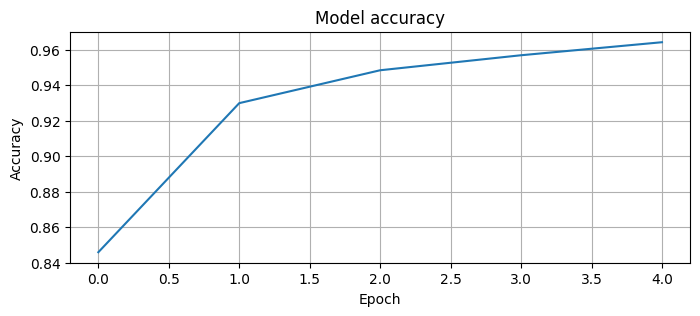

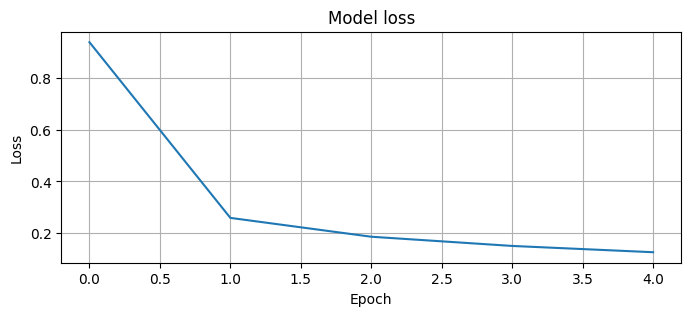

In [49]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 3))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 3))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


##### Sample Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


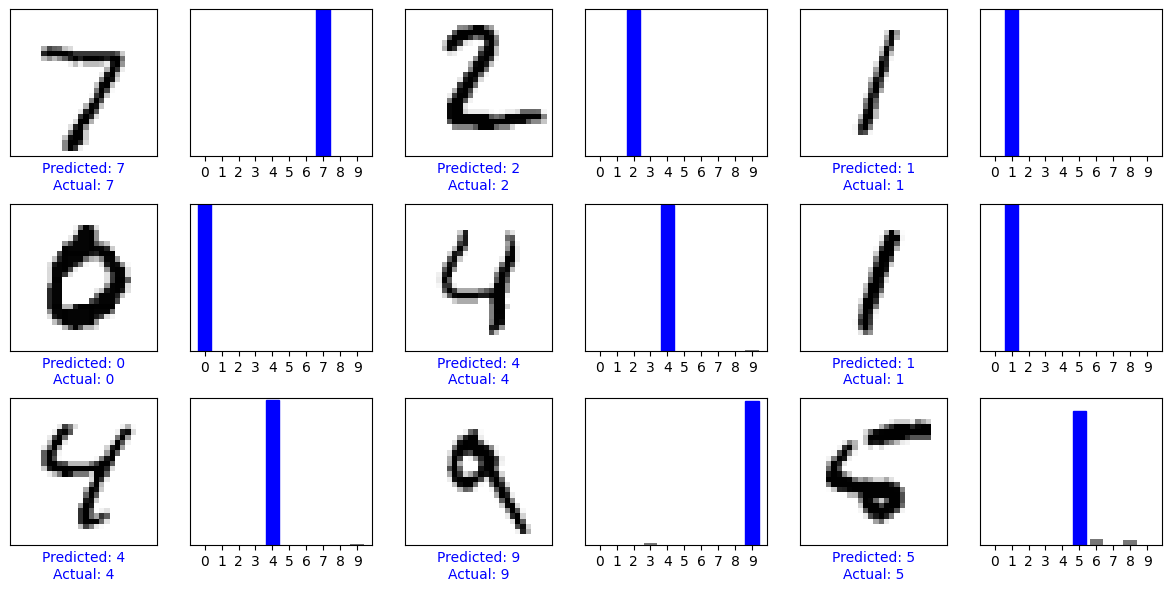

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test dataset
predictions = model.predict(test_images)

# Function to plot images along with predicted and actual labels
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"Predicted: {predicted_label}\nActual: {true_label}", color=color)

# Function to plot the prediction probabilities
def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plotting the test images, their predicted labels, and the true labels
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(predictions[i], test_labels[i])

plt.tight_layout()
plt.show()
